Objetivo: Classificar se uma máquina precisa ou não de manutenção   

In [7]:
from sklearn.model_selection import train_test_split # Importa biblioteca pra dividr os dados em treino e teste
import numpy as np # Biblioteca para trabalhar com arrays
from sklearn.tree import DecisionTreeClassifier # Importa o modelo da árvore de decisão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # Importa biblioteca seaborn para plotar gráficos
from sklearn import tree # Importa a biblioeca tree da biblioteca sklearn

Criando a base de dados

In [8]:
data = pd.DataFrame({
    'idade': [2,6,1,4,3,5],
    'tempo': [50,200,20,150,100,180],
    'falhas': [0,2,0,1,3,2],
    'classif': ['necessita', 'necessita', 'necessita', 'não necessita', 'necessita', 'não necessita']
})

Dividir os dados em treino e teste

Acurácia: 0.5
Precisão: 1.0


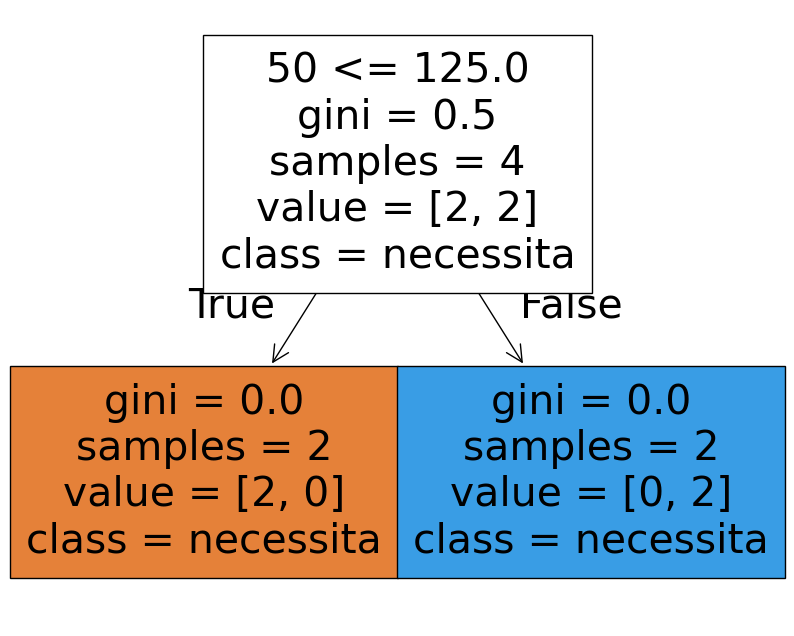

array([[1, 1],
       [0, 0]], dtype=int64)

In [11]:
x= np.array(data['tempo']) # Pega a coluna de tempo do dataframe
y= np.array(data['classif']) # Pega a coluna de classificação do dataframe
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1,1), y.reshape(-1,1),
                                                        test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)
prev = model.predict(x_teste)
accuracy = accuracy_score(y_teste, prev)
matrix = confusion_matrix(y_teste, prev)
precisao = precision_score(y_teste, prev, pos_label='necessita')
print (f'Acurácia: {accuracy}')
print (f'Precisão: {precisao}')
fig = plt.figure(figsize= (10,8))
tree.plot_tree(model, feature_names= x.tolist(), class_names=y.tolist(),filled=True)
plt.show()

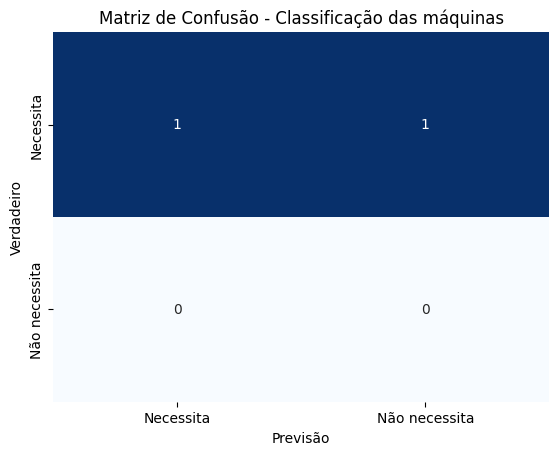

In [13]:
sns.heatmap(matrix,annot= True, fmt= 'd', cmap= 'Blues', cbar= False, xticklabels=['Necessita', 'Não necessita'], yticklabels=['Necessita','Não necessita'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()